[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


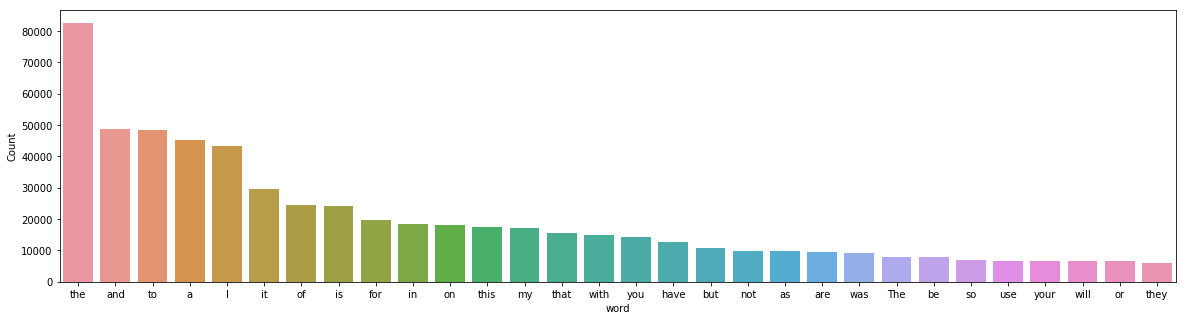

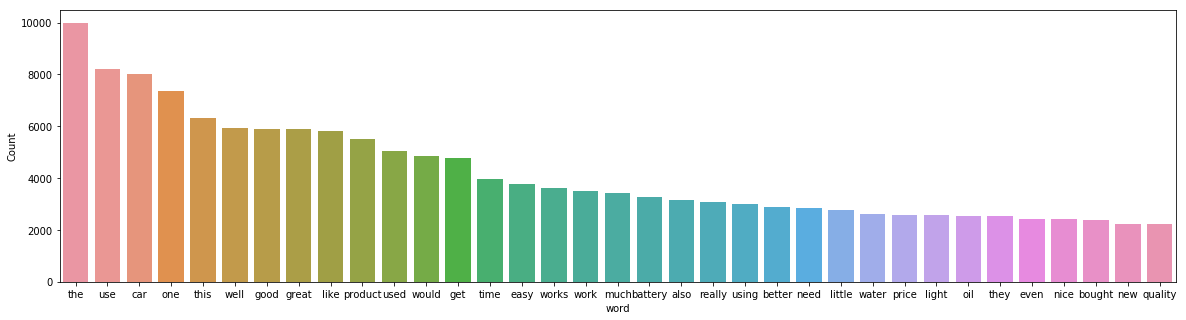

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'for', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'see', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']
['long', 'cable', 'fine', 'truck', 'quality', 'little', 'shabby', 'side', 'money', 'dollar', 'jumper', 'cable', 'chinese', 'shop', 'harbor', 'freight', 'buck']


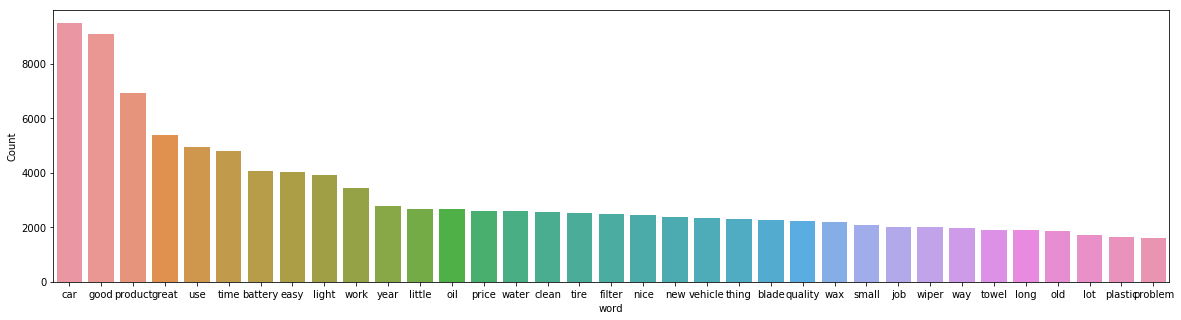

C:\Users\hp\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.073223 -0.031566       1        1  22.035030
2     -0.022149  0.063628       2        1  21.081844
0     -0.071841  0.096485       3        1  17.922073
6     -0.086894  0.210933       4        1  14.710124
5     -0.086404 -0.204971       5        1  10.349759
3     -0.060973 -0.131150       6        1   8.701197
1      0.401485 -0.003359       7        1   5.199978, topic_info=      Category         Freq         Term        Total  loglift  logprob
term                                                                   
148    Default  4618.000000        light  4618.000000  30.0000  30.0000
955    Default  2420.000000        blade  2420.000000  29.0000  29.0000
39     Default  2989.000000      battery  2989.000000  28.0000  28.0000
2      Default  9553.000000          car  9553.000000  27.0000  27.0000
931    Default  2017.000000        wiper  2017.000000  26.0000  26.0000
337    Default  2087.000000         tire  2087.000000  25.0000  25.0000
1319   Default  1573.000000      leather  1573.000000  24.0000  24.0000
530    Default  2839.000000        towel  2839.000000  23.0000  23.0000
2586   Default  1670.000000         bulb  1670.000000  22.0000  22.0000
95     Default  2407.000000        clean  2407.000000  21.0000  21.0000
320    Default  6518.000000      product  6518.000000  20.0000  20.0000
169    Default  1921.000000          oil  1921.000000  19.0000  19.0000
722    Default  1090.000000        wheel  1090.000000  18.0000  18.0000
526    Default  1874.000000          wax  1874.000000  17.0000  17.0000
62     Default  1543.000000        power  1543.000000  16.0000  16.0000
1275   Default  1133.000000       bright  1133.000000  15.0000  15.0000
966    Default  1417.000000       filter  1417.000000  14.0000  14.0000
760    Default  1153.000000       device  1153.000000  13.0000  13.0000
930    Default   868.000000   windshield   868.000000  12.0000  12.0000
235    Default   788.000000         seat   788.000000  11.0000  11.0000
551    Default  1281.000000         wash  1281.000000  10.0000  10.0000
733    Default  1168.000000         unit  1168.000000   9.0000   9.0000
646    Default  1194.000000        paint  1194.000000   8.0000   8.0000
728    Default  1558.000000         hose  1558.000000   7.0000   7.0000
512    Default   595.000000        brush   595.000000   6.0000   6.0000
525    Default  2872.000000        water  2872.000000   5.0000   5.0000
529    Default  1091.000000   microfiber  1091.000000   4.0000   4.0000
604    Default   920.000000        white   920.000000   3.0000   3.0000
1745   Default  1082.000000        spray  1082.000000   2.0000   2.0000
1190   Default   866.000000      charger   866.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
15853   Topic7    77.342056      bissell    78.066208   2.9472  -5.9058
2688    Topic7    72.892921      counter    73.611549   2.9467  -5.9651
6440    Topic7    72.424782         logo    73.146080   2.9466  -5.9715
2197    Topic7    70.474609       backup    71.195656   2.9463  -5.9988
2759    Topic7    65.521858   upholstery    66.239365   2.9456  -6.0717
4488    Topic7    64.155228     sunglass    64.876770   2.9453  -6.0927
2686    Topic7    63.646736         worn    64.366295   2.9453  -6.1007
2877    Topic7    63.123882         food    63.844196   2.9452  -6.1089
1053    Topic7    61.415730  convenience    62.139565   2.9448  -6.1364
473     Topic7   370.258209        board   418.329590   2.8344  -4.3398
235     Topic7   622.249023         seat   788.953125   2.7191  -3.8207
1406    Topic7   436.515564        smell   555.141663   2.7161  -4.1752
1062    Topic7   178.285126      kitchen   203.746216   2.8230  -5.0707
1243    Topic7   117.262932         boot   132.943253   2.8310  -5.4896
337     Topic7  1110.219727         tire  2087.356934   2.3252  -3.2417
1544    Topic7 

In [2]:
#https://kldavenport.com/topic-modeling-amazon-reviews/
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_json('Automotive_5.json', lines=True)
df.head()

# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
    
freq_words(df['reviewText'])

# remove unwanted characters, numbers and symbols
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

freq_words(reviews, 35)

#tokenize the reviews and then lemmatize the tokenized reviews.
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review
#not just lemmatized the words but also filtered only nouns and adjectives

#de-tokenize the lemmatized reviews
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)



#Building an LDA model
#creating the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

#convert the list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)


# Print the Keyword in the 10 topics
lda_model.print_topics()

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis
